In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Players = pd.read_csv("player_data.csv")
Seasons = pd.read_csv("Seasons_Stats.csv")

In [4]:
Players.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [5]:
Players.columns

Index(['name', 'year_start', 'year_end', 'position', 'height', 'weight',
       'birth_date', 'college'],
      dtype='object')

In [6]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [7]:
Seasons.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [8]:
Seasons.drop(columns = "Unnamed: 0",inplace=True)

In [9]:
Seasons.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

Fist, let's __clean__ the data from the Players table

In [10]:
Players.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


Convert __Height__ from foot to meter

Let's drop this player row as no position or height are precised and he only played for 4 seasons.

In [11]:
Players.dropna(subset=["height"],inplace=True)

Create a fonction to convert foot into meters, as we are going to split the height columns in two with the foot number
on the left and the inch number on the right.

In [12]:
def conv(L):
    return int(L[0])*0.3048 + int(L[-1])*0.0254

Let's apply this fonction to every rows of the height column to convert and create a height column in meters.

In [13]:
Players.insert(4,column="height_meter",value=Players.height.str.split('-').apply(conv)) 

In [14]:
Players.drop(columns="height",inplace=True)

In [15]:
Players.height_meter = Players.height_meter.round(2)

In [16]:
Players.head()

,name,year_start,year_end,position,height_meter,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,2.08,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,2.06,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,2.18,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,1.85,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,1.98,223.0,"November 3, 1974",San Jose State University


Convert __Weight__ from Lbs to Kg

In [17]:
Players.weight*0.453592

0       108.862080
1       106.594120
2       102.058200
3        73.481904
4       101.151016
           ...    
4545    113.398000
4546    108.862080
4547     77.110640
4548    120.201880
4549     88.450440
Name: weight, Length: 4549, dtype: float64

In [18]:
Players.insert(5,column = "weight_kilo",value = Players.weight*0.453592)

In [19]:
Players.weight_kilo = Players.weight_kilo.round(2)

In [20]:
Players.drop(columns = "weight",inplace = True)

In [21]:
Players.head()

,name,year_start,year_end,position,height_meter,weight_kilo,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,2.08,108.86,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,2.06,106.59,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,2.18,102.06,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,1.85,73.48,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,1.98,101.15,"November 3, 1974",San Jose State University


Let's deal with the others Naan values 

In [22]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4549 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4549 non-null   object 
 1   year_start    4549 non-null   int64  
 2   year_end      4549 non-null   int64  
 3   position      4549 non-null   object 
 4   height_meter  4549 non-null   float64
 5   weight_kilo   4544 non-null   float64
 6   birth_date    4518 non-null   object 
 7   college       4247 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 319.9+ KB


For players with missing weight, let's replace the NA values by the mean of the weight of the other players in their category, thanks to a group by.

In [23]:
Players[Players.weight_kilo.isna()]

,name,year_start,year_end,position,height_meter,weight_kilo,birth_date,college
2360,Dick Lee,1968,1968,F,1.98,NaN,NaN,University of Washington
2783,Murray Mitchell,1950,1950,C,1.98,NaN,"March 19, 1923",Sam Houston State University
2973,Paul Nolen,1954,1954,C,2.08,NaN,"September 3, 1929",Texas Tech University
4279,Ray Wertis,1947,1948,G,1.80,NaN,"January 1, 1922",St. John's University
4472,Bob Wood,1950,1950,G,1.78,NaN,"October 7, 1921",Northern Illinois University


In [24]:
Players.groupby(["position"]).weight_kilo.transform("mean")

0       101.573814
1       103.872466
2       110.926720
3        84.766985
4        98.945896
           ...    
4545    101.573814
4546    110.926720
4547     84.766985
4548    110.926720
4549     89.634167
Name: weight_kilo, Length: 4549, dtype: float64

In [25]:
Players.weight_kilo.fillna(value = Players.groupby(["position"]).weight_kilo.transform("mean"),inplace=True)

In [26]:
Players[Players.weight_kilo.isna()]

,name,year_start,year_end,position,height_meter,weight_kilo,birth_date,college


In [27]:
Players.loc[[2360,2783,2973,4279,4472]]

,name,year_start,year_end,position,height_meter,weight_kilo,birth_date,college
2360,Dick Lee,1968,1968,F,1.98,98.945896,NaN,University of Washington
2783,Murray Mitchell,1950,1950,C,1.98,110.926720,"March 19, 1923",Sam Houston State University
2973,Paul Nolen,1954,1954,C,2.08,110.926720,"September 3, 1929",Texas Tech University
4279,Ray Wertis,1947,1948,G,1.80,84.766985,"January 1, 1922",St. John's University
4472,Bob Wood,1950,1950,G,1.78,84.766985,"October 7, 1921",Northern Illinois University


For Birthday and College there is no necessity to fill those missing values for further analysis

Then, let's clean the __Seasons__ table

In [28]:
Seasons.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [29]:
Seasons.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [30]:
Seasons.shape

(24691, 52)

Let's drop the row with no player name

In [31]:
Seasons.dropna(subset="Player",inplace=True)

In [32]:
Seasons.shape

(24624, 52)

In [33]:
pd.options.display.min_rows = 40

In [34]:
Seasons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24624 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22  DWS

For the other columns, no need to fill the Na values.

Let's search for eventual duplicates now

In [35]:
Players[Players.duplicated()]

,name,year_start,year_end,position,height_meter,weight_kilo,birth_date,college


In [36]:
Seasons[Seasons.duplicated()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


No duplicates found 

In [37]:
Seasons.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

Let's drop the columns 'blank2' and 'blanl' which are just filled with NA values

In [38]:
Seasons.drop(columns = ["blanl","blank2"],inplace=True)

Let's replace the column names by more understable labels.

In [39]:
dic = {'Pos' : 'Position','Tm' :"Team", 'G' : 'Games' , 'GS' : 'Games_started' , 'MP' : 'Minutes_Played',
 'PER' : 'player_efficiency_rating','TS' : 'True_shooting' , '3PAr' : '3_Point_attempt_rate',
  'FTr' : 'Free_Throw_rate' , 'ORB%' : 'Offensive_Rebound%' , 'DRB%' : 'Defensive_rebound%',
   'TRB%' : 'Total_rebound_Per', 'AST%' : "Assist%" , 'STL%' : 'Steal%' , 'BLK%' : 'Block_Per',
   'TOV%' : 'Turn_over_Per','USG%' : 'Usage_rate_Per' , 'OWS' : 'Offensive_win_share', 'DWS' : 'Defensive_win_share',
   'WS' : 'Win_share','WS/48' : 'Win_share/min' , 'OBPM' : 'Offensive_Box','DBPM' : 'Defensive_Box',
   'BPM' : 'Box','VORP' : 'Value_Over_Replacement_Player' , 'FG' : 'Field_Goal' , 'FGA' : 'Field_goal_attempted',
   'FG%' : 'Field_Goal_Per' , '3P' : 'Three_Point' , '3PA' : 'Three_Point_attempted' , '3P%' : 'Three_Point_Per', '2P' : 'Two_Points','2PA':
   'Two_Points_attempted' , '2P%' : 'Two_Point_Per','eFG%' : 'effective_Field_goal_Per','FT' : 'Free_Throws' , 'FTA' : 'Free_Throws_attempted',
   'FT%' : 'Free_throw_Per','ORB' : 'Offensive_rebound','DRB' : 'Defensive_rebound' , 'TRB' : 'Total_rebound',
   'AST' : 'Assist' , 'STL' : 'Steal' , 'BLK' : 'Block' , 'TOV' : 'Turn_Over' , 'PF' : 'Personnal_fouls' , 'PTS' : 'Points',
   'TS%' : 'True_shooting_Per'}

In [40]:
Seasons.rename(columns=dic,inplace=True)

In [41]:
Seasons.columns

Index(['Year', 'Player', 'Position', 'Age', 'Team', 'Games', 'Games_started',
       'Minutes_Played', 'player_efficiency_rating', 'True_shooting_Per',
       '3_Point_attempt_rate', 'Free_Throw_rate', 'Offensive_Rebound%',
       'Defensive_rebound%', 'Total_rebound_Per', 'Assist%', 'Steal%',
       'Block_Per', 'Turn_over_Per', 'Usage_rate_Per', 'Offensive_win_share',
       'Defensive_win_share', 'Win_share', 'Win_share/min', 'Offensive_Box',
       'Defensive_Box', 'Box', 'Value_Over_Replacement_Player', 'Field_Goal',
       'Field_goal_attempted', 'Field_Goal_Per', 'Three_Point',
       'Three_Point_attempted', 'Three_Point_Per', 'Two_Points',
       'Two_Points_attempted', 'Two_Point_Per', 'effective_Field_goal_Per',
       'Free_Throws', 'Free_Throws_attempted', 'Free_throw_Per',
       'Offensive_rebound', 'Defensive_rebound', 'Total_rebound', 'Assist',
       'Steal', 'Block', 'Turn_Over', 'Personnal_fouls', 'Points'],
      dtype='object')

Let's adapt the datatype for the Players table so we can make further SQL request

In [42]:
Players.name = Players.name.astype("string")

In [43]:
Players.year_start = Players.year_start.astype("float")

In [44]:
Players.year_end = Players.year_end.astype("float")

In [45]:
Players.position = Players.position.astype("string")

In [46]:
Players.birth_date = Players.birth_date.astype("string")

In [47]:
Players.college = Players.college.astype("string")

Let's get some statistics from the Players attributes

In [99]:
plt.style.use('seaborn')

C:\Users\chimb\AppData\Local\Temp\ipykernel_29388\240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


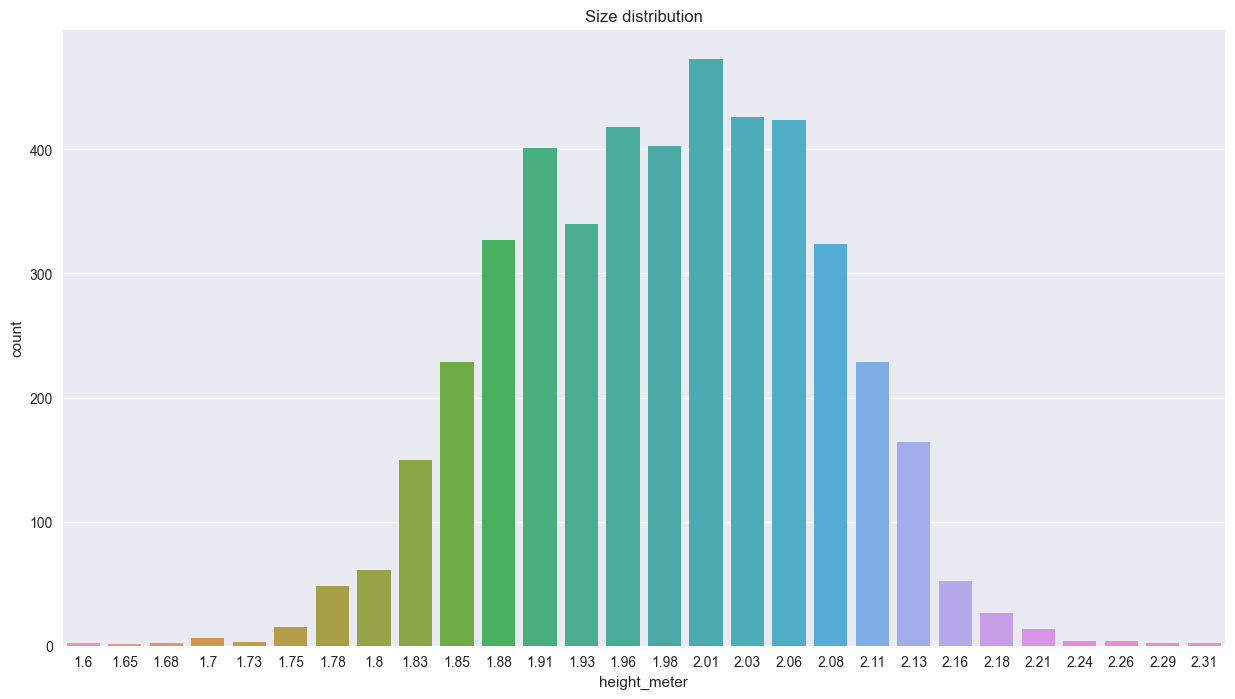

In [100]:
plt.figure(figsize=(15,8))
sns.countplot(Players,x=Players.height_meter)
plt.title('Size distribution')
plt.show()

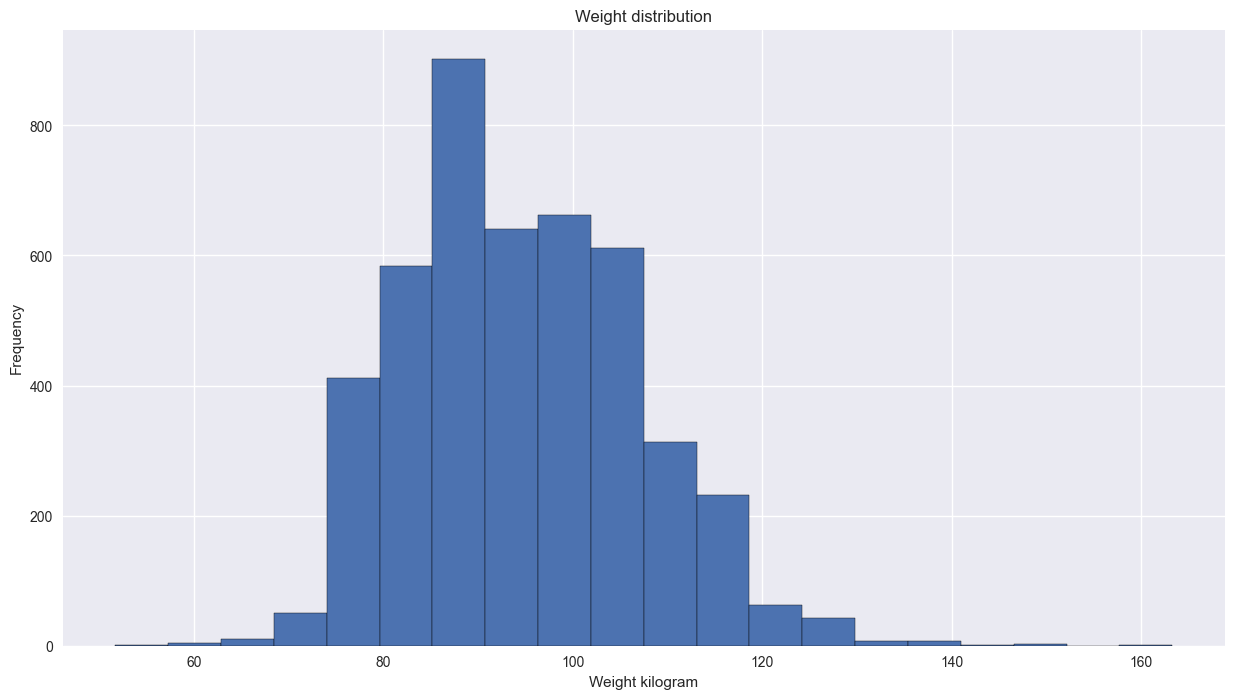

In [101]:
plt.figure(figsize=(15,8))
Players.weight_kilo.plot(kind='hist',bins=20,edgecolor='black')
plt.title('Weight distribution')
plt.xlabel('Weight kilogram')
plt.show()

In [48]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4549 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4549 non-null   string 
 1   year_start    4549 non-null   float64
 2   year_end      4549 non-null   float64
 3   position      4549 non-null   string 
 4   height_meter  4549 non-null   float64
 5   weight_kilo   4549 non-null   float64
 6   birth_date    4518 non-null   string 
 7   college       4247 non-null   string 
dtypes: float64(4), string(4)
memory usage: 448.9 KB


In [49]:
Players.to_csv("Players.csv",index = False)

In [50]:
Seasons.describe()

,Year,Age,Games,Games_started,Minutes_Played,player_efficiency_rating,True_shooting_Per,3_Point_attempt_rate,Free_Throw_rate,Offensive_Rebound%,...,Free_throw_Per,Offensive_rebound,Defensive_rebound,Total_rebound,Assist,Steal,Block,Turn_Over,Personnal_fouls,Points
count,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,20792.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,6.181565,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,4.872685,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,2.600000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,5.400000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,9.000000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,100.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


__No shocking outliers__

Let's take some data online to get the NBA champions Team by year and the MVP Final

In [51]:
champions = pd.read_html('https://champsorchumps.us/records/nba-champions-full-list')[0]

In [52]:
champions["Winner"] = champions.Winner.str.split('(',expand=True).drop(columns = 1)

In [53]:
champions.drop(columns = "Loser",inplace=True)

Removing useless spaces

In [54]:
champions.Winner = champions.Winner.str.strip()

In [55]:
Seasons.Team.unique()

array(['FTW', 'INO', 'CHS', 'TOT', 'DNN', 'NYK', 'TRI', 'AND', 'PHW',
       'WAT', 'SHE', 'ROC', 'BLB', 'MNL', 'SYR', 'WSC', 'BOS', 'STB',
       'MLH', 'STL', 'DET', 'CIN', 'LAL', 'CHP', 'SFW', 'CHZ', 'BAL',
       'PHI', 'CHI', 'SDR', 'SEA', 'MIL', 'ATL', 'PHO', 'POR', 'CLE',
       'BUF', 'HOU', 'GSW', 'KCO', 'CAP', 'NOJ', 'WSB', 'KCK', 'IND',
       'NYN', 'DEN', 'SAS', 'NJN', 'SDC', 'UTA', 'DAL', 'LAC', 'SAC',
       'CHH', 'MIA', 'ORL', 'MIN', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH',
       'CHA', 'NOK', 'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

In [56]:
champions.Winner.unique()

array(['Denver Nuggets', 'Golden State Warriors', 'Milwaukee Bucks',
       'Los Angeles Lakers', 'Toronto Raptors', 'Cleveland Cavaliers',
       'San Antonio Spurs', 'Miami Heat', 'Dallas Mavericks',
       'Boston Celtics', 'Detroit Pistons', 'Chicago Bulls',
       'Houston Rockets', 'Philadelphia 76ers', 'Seattle SuperSonics',
       'Washington Bullets', 'Portland Trail Blazers', 'New York Knicks',
       'St. Louis Hawks', 'Philadelphia Warriors', 'Syracuse Nationals',
       'Minneapolis Lakers', 'Rochester Royals'], dtype=object)

Adding code to Team, keep code to current franchise


In [57]:
team  = {'Denver Nuggets' : 'DEN', 'Golden State Warriors' : 'GSW' , 'Milwaukee Bucks' : 'MIL',
'Los Angeles Lakers': 'LAL', 'Toronto Raptors' : 'TOR', 'Cleveland Cavaliers' : 'CLE',
'San Antonio Spurs' : 'SAS', 'Miami Heat' : 'MIA', 'Dallas Mavericks' : 'DAL',
'Boston Celtics' : 'BOS', 'Detroit Pistons' : 'DET', 'Chicago Bulls' : 'CHI',
'Houston Rockets' : 'HOU', 'Philadelphia 76ers' : 'PHI', 'Seattle SuperSonics' : 'OKC',
'Washington Bullets' : 'WAS', 'Portland Trail Blazers' : 'POR', 'New York Knicks' : 'NYK',
'St. Louis Hawks' : 'ATL', 'Philadelphia Warriors' : 'GSW', 'Syracuse Nationals' : 'PHI',
'Minneapolis Lakers' : 'LAL', 'Rochester Royals' : 'SAC'}

In [58]:
champions["Code"] = champions.Winner.map(team)

In [59]:
champions.head()

,Year,Winner,Code
0,2023,Denver Nuggets,DEN
1,2022,Golden State Warriors,GSW
2,2021,Milwaukee Bucks,MIL
3,2020,Los Angeles Lakers,LAL
4,2019,Toronto Raptors,TOR


Let's add the city where each franchised is based

In [60]:
champions.Winner.unique()

array(['Denver Nuggets', 'Golden State Warriors', 'Milwaukee Bucks',
       'Los Angeles Lakers', 'Toronto Raptors', 'Cleveland Cavaliers',
       'San Antonio Spurs', 'Miami Heat', 'Dallas Mavericks',
       'Boston Celtics', 'Detroit Pistons', 'Chicago Bulls',
       'Houston Rockets', 'Philadelphia 76ers', 'Seattle SuperSonics',
       'Washington Bullets', 'Portland Trail Blazers', 'New York Knicks',
       'St. Louis Hawks', 'Philadelphia Warriors', 'Syracuse Nationals',
       'Minneapolis Lakers', 'Rochester Royals'], dtype=object)

In [61]:
def get_city(L):
    return L[:-1]

In [62]:
City = champions.Winner.str.split().apply(get_city)

In [63]:
City

0            [Denver]
1     [Golden, State]
2         [Milwaukee]
3      [Los, Angeles]
4           [Toronto]
5     [Golden, State]
6     [Golden, State]
7         [Cleveland]
8     [Golden, State]
9      [San, Antonio]
10            [Miami]
11            [Miami]
12           [Dallas]
13     [Los, Angeles]
14     [Los, Angeles]
15           [Boston]
16     [San, Antonio]
17            [Miami]
18     [San, Antonio]
19          [Detroit]
           ...       
54           [Boston]
55           [Boston]
56     [Philadelphia]
57           [Boston]
58           [Boston]
59           [Boston]
60           [Boston]
61           [Boston]
62           [Boston]
63           [Boston]
64           [Boston]
65       [St., Louis]
66           [Boston]
67     [Philadelphia]
68         [Syracuse]
69      [Minneapolis]
70      [Minneapolis]
71      [Minneapolis]
72        [Rochester]
73      [Minneapolis]
Name: Winner, Length: 74, dtype: object

Now let's put the words together again

In [64]:
def agg(M):
    return ' '.join(M)

In [65]:
City = City.apply(agg)

In [66]:
champions.insert(3,column = "City",value = City)

Let's replace "Golden State" by "Oakland"

In [67]:
champions.City = champions.City.replace(to_replace = "Golden State",value = "Oakland")

In [68]:
champions.City = champions.City.replace(to_replace = "Portland Trail",value = "Portland")

Let's delete the values after 2017 because we are only going to use datas from 1950 to 2017

In [69]:
champions.head()

,Year,Winner,Code,City
0,2023,Denver Nuggets,DEN,Denver
1,2022,Golden State Warriors,GSW,Oakland
2,2021,Milwaukee Bucks,MIL,Milwaukee
3,2020,Los Angeles Lakers,LAL,Los Angeles
4,2019,Toronto Raptors,TOR,Toronto


In [70]:
champions = champions[6:]

In [71]:
champions.reset_index(inplace=True)

In [72]:
champions.drop(columns = "index",inplace=True)

In [73]:
champions.head()

,Year,Winner,Code,City
0,2017,Golden State Warriors,GSW,Oakland
1,2016,Cleveland Cavaliers,CLE,Cleveland
2,2015,Golden State Warriors,GSW,Oakland
3,2014,San Antonio Spurs,SAS,San Antonio
4,2013,Miami Heat,MIA,Miami


In [74]:
champions.Code.unique()

array(['GSW', 'CLE', 'SAS', 'MIA', 'DAL', 'LAL', 'BOS', 'DET', 'CHI',
       'HOU', 'PHI', 'OKC', 'WAS', 'POR', 'NYK', 'MIL', 'ATL', 'SAC'],
      dtype=object)

Now let's create a column for seasons in which all the different team names are reunited in the same franchise_code , as some franchises changed name several times since their creation (see NBA table for more explanations) 'NA':non active franchises!, so we will not count them as this study only is about active franchises.

In [75]:
Seasons.rename(columns = {'Team' : 'Team_code'},inplace = True)

In [76]:
Seasons.Team_code.unique()

array(['FTW', 'INO', 'CHS', 'TOT', 'DNN', 'NYK', 'TRI', 'AND', 'PHW',
       'WAT', 'SHE', 'ROC', 'BLB', 'MNL', 'SYR', 'WSC', 'BOS', 'STB',
       'MLH', 'STL', 'DET', 'CIN', 'LAL', 'CHP', 'SFW', 'CHZ', 'BAL',
       'PHI', 'CHI', 'SDR', 'SEA', 'MIL', 'ATL', 'PHO', 'POR', 'CLE',
       'BUF', 'HOU', 'GSW', 'KCO', 'CAP', 'NOJ', 'WSB', 'KCK', 'IND',
       'NYN', 'DEN', 'SAS', 'NJN', 'SDC', 'UTA', 'DAL', 'LAC', 'SAC',
       'CHH', 'MIA', 'ORL', 'MIN', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH',
       'CHA', 'NOK', 'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

In [77]:
franchise = {'FTW' : 'NA' , 'INO' : 'NA' ,'CHS':'NA','TOT':'NA','DNN':'DEN' , 'TRI' : 'ATL','AND' : 'NA','PHW':'GSW',
'WAT':'NA','SHE':'NA','ROC':'SAC','BLB':'WAS','MNL':'LAL','SYR':'PHI','WSC':'NA','STB':'NA','MLH':'ATL','STL':'ATL',
'CIN':'SAC','CHP':'WAS','SFW':'GSW','CHZ':'WAS','BAL':'WAS','SDR':'HOU','SEA':'OKC','BUF':'LAC','KCO':'SAC','CAP':'WAS',
'NOJ':'UTA','WSB':'WAS','KCK':'SAC','NYN':'BRK','NJN':'BRK','SDC':'LAC','CHH':'NA','VAN':'MEM','NOH':'NOP','NOK':'NOP',
'CHO':'NA','ATL':'ATL', 'BOS':'BOS','BRK':'BRK','CHA':'CHA','CHI':'CHI','CLE':'CLE','DAL':'DAL','DEN':'DEN','DET':'DET','GSW':'GSW',
'HOU':'HOU','IND':'IND','LAC':'LAC','LAL':'LAL','MEM':'MEM','MIA':'MIA','MIL':'MIL','MIN':'MIN','NOP':'NOP','NYK':'NYK','OKC':'OKC','ORL':'ORL',
'PHI':'PHI','PHX':'PHX','POR':'POR','SAC':'SAC','SAS':'SAS','TOR':'TOR','UTA':'UTA','WAS':'WAS','PHO':'PHO','CHO':'CHA','CHH' : 'CHA'}

In [78]:
Seasons["Franchise_code"] = Seasons.Team_code.map(franchise)

In [79]:
Seasons.head()

,Year,Player,Position,Age,Team_code,Games,Games_started,Minutes_Played,player_efficiency_rating,True_shooting_Per,...,Offensive_rebound,Defensive_rebound,Total_rebound,Assist,Steal,Block,Turn_Over,Personnal_fouls,Points,Franchise_code
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,NA
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,NA
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,NA
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0,NA
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,DEN


In [80]:
Seasons.Player = Seasons.Player.str.replace('*','')

Let's export to excel and csv format for further SQL analysis and Tableau Visualisations. 

In [81]:
Seasons.to_excel("Seasons.xlsx",index=False)
Seasons.to_csv("Seasons.csv",index=False)